* [1. Importando librerias](#section1)
 * [1.1 valores nulos](#section11)
 * [1.2 nombre de las columnas](#section12)
 * [1.3 Eliminacion de variables que tienen valores nulos](#section13)
 * [1.4 Eliminacion de filas que tienen valores nulos](#section14)
 * [1.5 Visualizar los valores nulos en un grafico](#section15)
 * [1.6 Tipo de variables](#section16)
* [2. Imputacion](#section2)
 * [2.1 Imputacion df](#section21)
  * [2.1.1 Imputacion Forward Fill : series de tiempo](#section211)
   * [2.1.1.1 Lo convertimos en un DataFrame](#section2111)
   * [2.1.1.2 Agregamos una columna](#section2112)
   * [2.1.1.3 Eliminamos una columna](#section2113)
   * [2.1.1.4 Unimos dos DataFrame](#section2114)
   * [2.1.1.5 Mi DataFrame Final : 'df5'](#section2115)
  * [2.1.2 Imputacion Backward Fill : Si la BD esta agrupada por rango de edades](#section212)
   * [2.1.2.1 Agregamos una columna](#section2121)
   * [2.1.2.2 Mi DataFrame Final : 'df6'](#section2122)
  * [2.1.3 Imputacion Media](#section213)
   * [2.1.3.1  Agregamos una columna](#section2131)
  * [2.1.4 Imputacion Mediana](#section214)
   * [2.1.4.1 Agregamos una columna](#section2141)
  * [2.1.5 Imputacion Moda](#section215)
   * [2.1.5.1 Agregamos una columna](#section2151)
  * [2.1.6 Simple Imputer- media](#section216)
  * [2.1.7 Simple Imputer- mediana](#section217)
  * [2.1.8 Simple Imputer- moda](#section218)
* [3. Outliers](#section3)
 * [3.1 Identifcando valores outliers: Univariado](#section31)
  * [3.1.1 Rango Intercuartil](#section311)
  * [3.1.2 Puntuacion Z ](#section312)
 * [3.2 Identificacion de valores outliers :Multivariado](#section32)
* [4 cargando DataFrame](#section4)
 * [4.1 Crear factores categoricos](#section41)
 * [4.2 Metodos para llevar todos a un Mismo Rango](#section42)
   * [4.2.1 Normalizacion Z-Score](#section421)
   * [4.2.2 Normalizacion Min-Max](#section422)
   * [4.2.3 Escalamiento Decimal](#section423)
   * [4.2.4 Normalizacion softmax](#section424)
   * [4.2.5 Visualizacion](#section425)
* [5 Variables Categoricas y Transfomaciones](#section5)
 * [5.1 Factores de igual frecuencias](#section51)
   * [5.1.1 Variable predictora "DM"  lo rankeamos en 10 partes](#section511)
   * [5.1.2 Se puede observar que  la varaible predictora "DM" toma los valores de [0,9]](#section512)
   * [5.1.3 Agrupamos la variable predictora "DM"](#section513)
     * [5.1.3.1 Conteo de la variable predictora "DM"](#section5131)
 * [5.2 Factores de igual amplietud de intervalos](#section52)
   * [5.2.1 Agrupamos la variable predictora "DM"](#section521)
   * [5.2.2 Conteo de la variable predictora "DM"](#section522)
    * [5.2.2.1 Conteo de la variable predictora "DM"](#section5221)
* [6 Transformacion de Variables](#section6)
  * [6.1 transformacion "logaritmica"](#section61)
  * [6.2 transformacion "exponencial"](#section62)
  * [6.3 transformacion "box cox"](#section63)
  * [6.4 transformacion "Yeo-Johnson"](#section64)
* [7 Variables dummy](#section7)

<a id="section1"></a>
## <font color="#004D7F">1. Importando librerias</font>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Datos_unalm/titanic3.csv')

In [2]:
df.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


<a id="section11"></a>
## <font color="#004D7F">1.1 valores nulos</font>

In [3]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<a id="section12"></a>
## <font color="#004D7F">1.2 nombre de las columnas</font>

In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

<a id="section13"></a>
## <font color="#004D7F">1.3 Eliminacion de variables que tienen valores nulos</font>

In [5]:
df1=df.dropna(axis=1)

In [6]:
df1.isnull().sum()

pclass      0
survived    0
name        0
sex         0
sibsp       0
parch       0
ticket      0
dtype: int64

In [7]:
df1.shape

(1309, 7)

<a id="section14"></a>
## <font color="#004D7F">1.4 Eliminacion de filas que tienen valores nulos</font>

In [8]:
df2=df1.dropna(axis=0)

In [9]:
df2.isnull().sum()

pclass      0
survived    0
name        0
sex         0
sibsp       0
parch       0
ticket      0
dtype: int64

In [10]:
df2.shape

(1309, 7)

<a id="section15"></a>
## <font color="#004D7F">1.5 Visualizar los valores nulos en un grafico</font>

In [11]:
import missingno as msno

<AxesSubplot:>

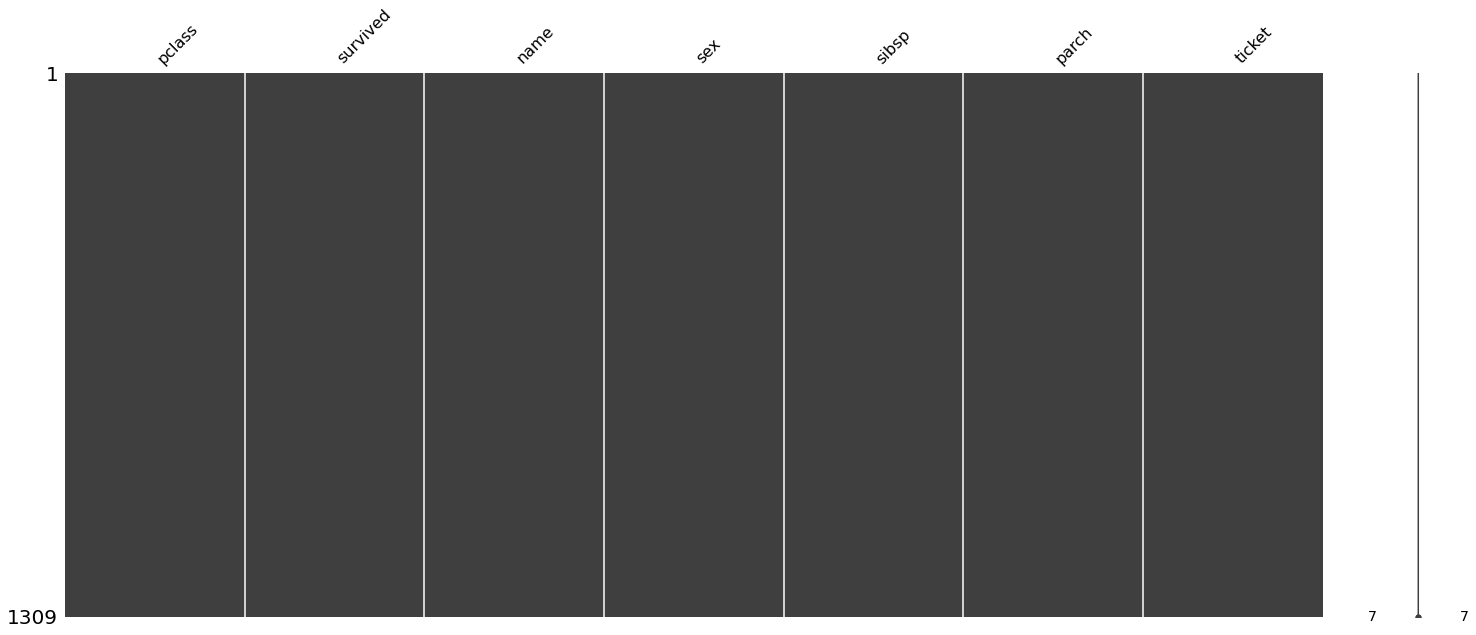

In [12]:
msno.matrix(df2)

<AxesSubplot:>

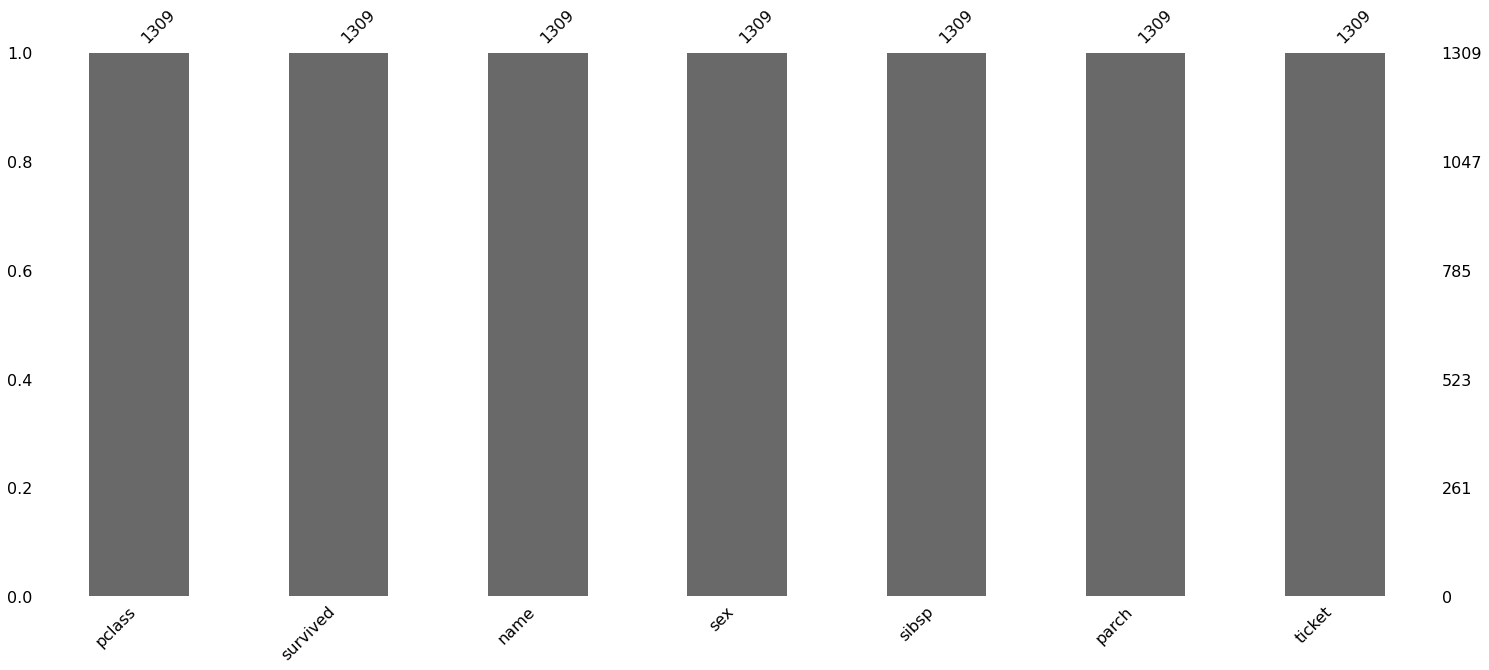

In [13]:
msno.bar(df2)

### Comentario:
#### Se puede observar que no hay valores nulos

<a id="section16"></a>
## <font color="#004D7F">1.6 Tipo de variables</font>

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   name      1309 non-null   object
 3   sex       1309 non-null   object
 4   sibsp     1309 non-null   int64 
 5   parch     1309 non-null   int64 
 6   ticket    1309 non-null   object
dtypes: int64(4), object(3)
memory usage: 81.8+ KB


In [15]:
df2.dtypes

pclass       int64
survived     int64
name        object
sex         object
sibsp        int64
parch        int64
ticket      object
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

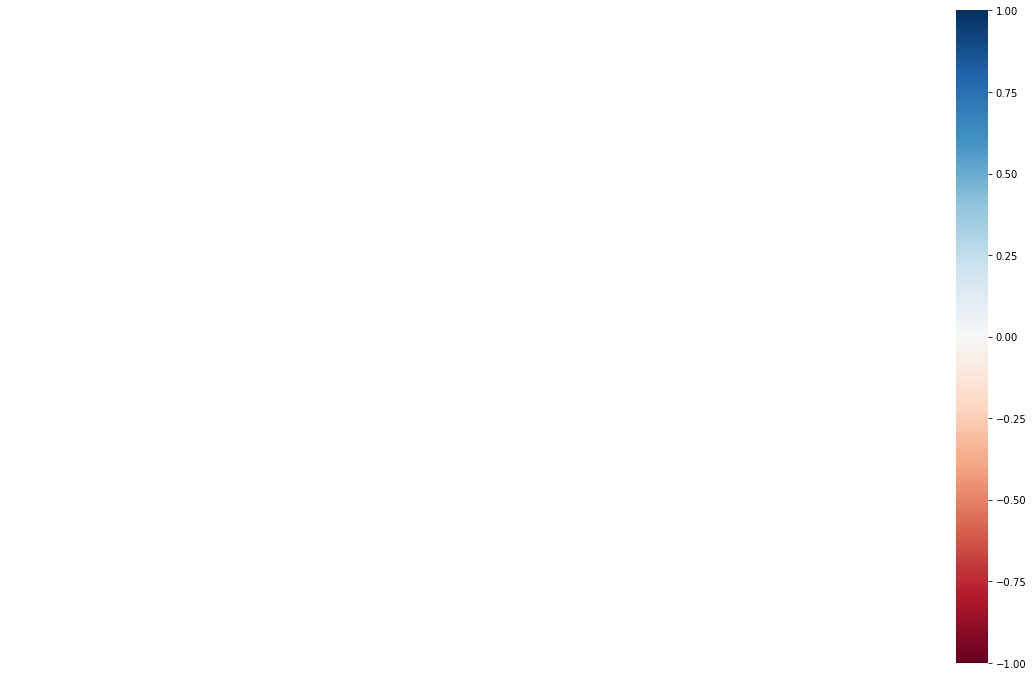

In [16]:
msno.heatmap(df2)

### Comentario:
#### Se puede observar que entre las variables no hay correlacion

<AxesSubplot:>

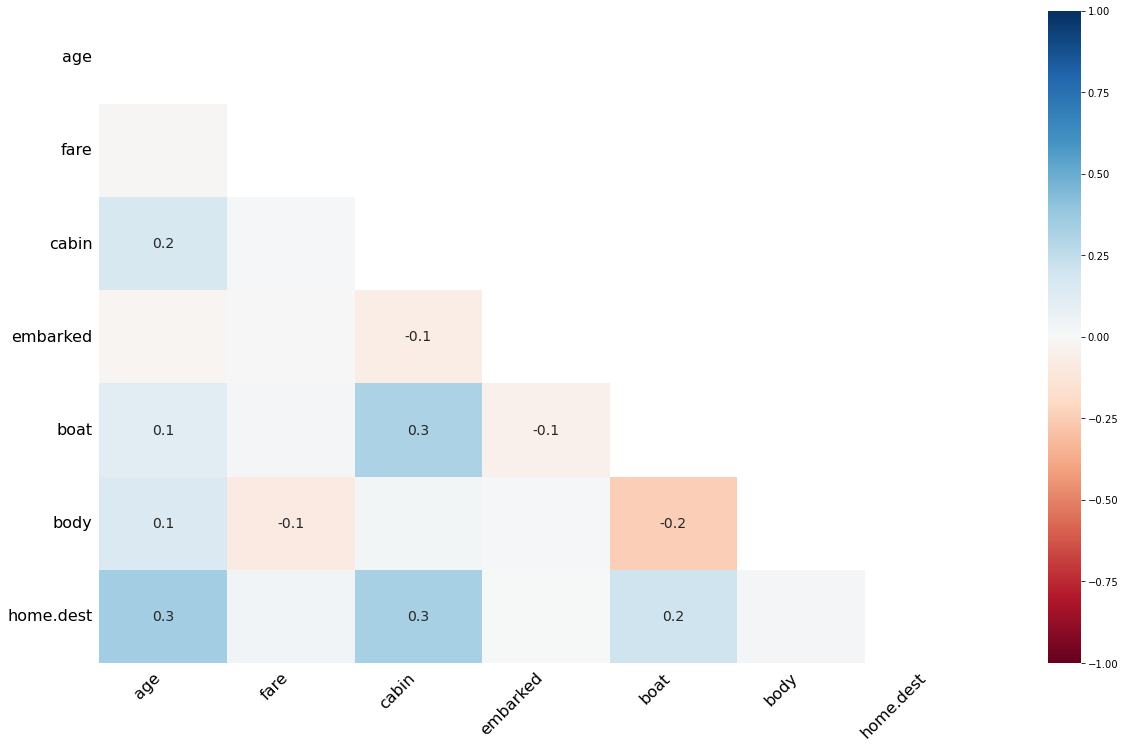

In [17]:
msno.heatmap(df)

### Comentario:
#### Se puede observar que entre las variables  hay correlacion(esta data era el inicio)

<a id="section2"></a>
## <font color="#004D7F">2. Imputacion</font>

In [18]:
df2.columns

Index(['pclass', 'survived', 'name', 'sex', 'sibsp', 'parch', 'ticket'], dtype='object')

In [19]:
df2.isnull().sum()

pclass      0
survived    0
name        0
sex         0
sibsp       0
parch       0
ticket      0
dtype: int64

<a id="section21"></a>
## <font color="#004D7F">2.1 Imputacion df</font>

In [20]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<a id="section211"></a>
## <font color="#004D7F">2.1.1 Imputacion Forward Fill : series de tiempo</font>

In [21]:
df3=df

In [22]:
df3.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [23]:
df3.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#### ¿Cuantos valores hay?

In [24]:
df3.age.isnull().sum()

263

#### imputacion forward Fill :Series de tiempo

In [25]:
df4=df3['age'].fillna(method='ffill')
df4

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

<a id="section2111"></a>
## <font color="#004D7F">2.1.1.1 Lo convertimos en un DataFrame </font>


In [26]:
df4=pd.DataFrame(df4)

In [27]:

df4.head(5)

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000


<a id="section2112"></a>
## <font color="#004D7F">2.1.1.2 Agregamos una columna </font>


In [28]:
df4['age1']=df4['age']

In [29]:
df4.head(5)

,age,age1
0,29.0000,29.0000
1,0.9167,0.9167
2,2.0000,2.0000
3,30.0000,30.0000
4,25.0000,25.0000


<a id="section2113"></a>
## <font color="#004D7F">2.1.1.3 Eliminamos una columna </font>

In [30]:
df4=df4.drop(['age'],axis=1)

In [31]:
df4.head(5)

,age1
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000


<a id="section2114"></a>
## <font color="#004D7F">2.1.1.4 Unimos dos DataFrame </font>

In [32]:
df5=pd.concat([df3,df4],axis=1)

In [33]:
df5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,14.5000
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,14.5000
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,26.5000
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,27.0000


<a id="section2115"></a>
## <font color="#004D7F">2.1.1.5 Mi DataFrame Final : 'df5' </font>

In [34]:
df5=df5.drop(['age'],axis=1)
df5

,pclass,survived,name,sex,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age1
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,14.5000
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,14.5000
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,26.5000
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,27.0000


### Mi nuevo DataFrame  : 'df5' imputando po series de tiempo

<AxesSubplot:>

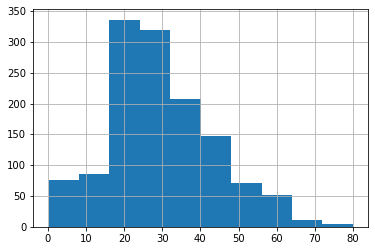

In [35]:
df5.age1.hist()

<AxesSubplot:>

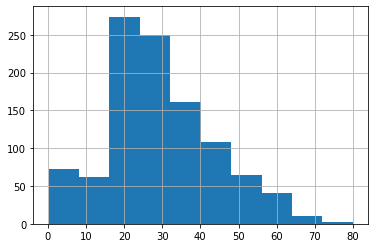

In [36]:
df.age.hist()

In [37]:
df.age.isnull().sum()

263

In [38]:
df5.age1.isnull().sum()

0

<a id="section212"></a>
## <font color="#004D7F">2.1.2 Imputacion Backward Fill : Si la BD esta agrupada por rango de edades</font>

In [39]:
df6=df

In [40]:
df6.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#### ¿Cuantos valores perdidos tiene 'age'?

In [41]:
df6.age.isnull().sum()

263

#### Imputacion Backward Fill

In [42]:
df6['age'].fillna(method='bfill')

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [43]:
df6.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<a id="section2121"></a>
## <font color="#004D7F">2.1.2.1 Agregamos una columna </font>


In [44]:
df6['age_backward']=df6['age'].fillna(method='bfill')

In [45]:
df6.isnull().sum()

pclass             0
survived           0
name               0
sex                0
age              263
sibsp              0
parch              0
ticket             0
fare               1
cabin           1014
embarked           2
boat             823
body            1188
home.dest        564
age_backward       0
dtype: int64

In [46]:
df6=df6.drop(['age'],axis=1)

In [47]:
df6.isnull().sum()

pclass             0
survived           0
name               0
sex                0
sibsp              0
parch              0
ticket             0
fare               1
cabin           1014
embarked           2
boat             823
body            1188
home.dest        564
age_backward       0
dtype: int64

#### La variable 'age' ya no tiene valores perdidos

In [48]:
df6.age_backward.isnull().sum()

0

<a id="section2122"></a>
## <font color="#004D7F">2.1.2.2 Mi DataFrame Final : 'df6'  </font>


In [49]:
df6

,pclass,survived,name,sex,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_backward
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,14.5000
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,26.5000
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,26.5000
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,27.0000


<AxesSubplot:>

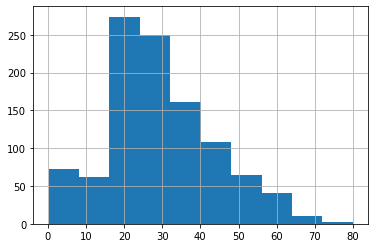

In [50]:
df.age.hist()

In [51]:
df.age.isnull().sum()

263

<AxesSubplot:>

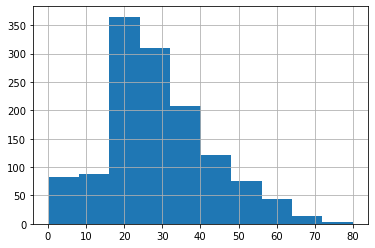

In [52]:
df6.age_backward.hist()

In [53]:
df6.age_backward.isnull().sum()

0

<a id="section213"></a>
## <font color="#004D7F">2.1.3 Imputacion Media</font>

 #### No usar cuando hay valores extremos

In [54]:
df7=df

In [55]:
df7.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_backward
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167


#### La media  de la variable 'age 'es: 

In [56]:
df7.age.mean()

29.8811345124283

#### ¿Cuantos valores perdidos hay?

In [57]:
df7.age.isnull().sum()

263

<a id="section2131"></a>
## <font color="#004D7F">2.1.3.1  Agregamos una columna</font>


In [58]:
df7['age_media']=df7['age'].fillna(df7['age'].mean())

#### La media  de la variable 'age 'es: 

In [59]:
df7.age_media.mean()

29.881134512428055

#### ¿Cuantos valores perdidos hay?

In [60]:
df7.age_media.isnull().sum()

0

<AxesSubplot:>

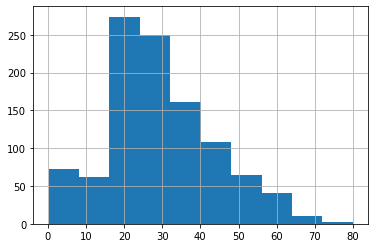

In [61]:
df7.age.hist()

<AxesSubplot:>

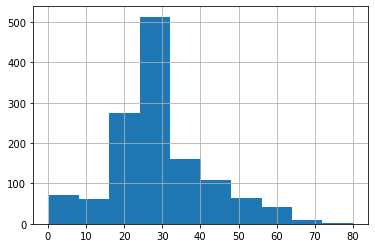

In [62]:
df7.age_media.hist()

In [63]:
df7.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

<a id="section214"></a>
## <font color="#004D7F">2.1.4 Imputacion Mediana</font>


#### La mediana no es sensible a valores extremos     *****

In [64]:
df8=df

In [65]:
df8.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_backward,age_media
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,2.0000


#### ¿Cuantos valores perdidos hay?

In [66]:
df8.age.isnull().sum()

263

#### La mediana es :

In [67]:
df8.age.median()

28.0

<a id="section2141"></a>
## <font color="#004D7F">2.1.4.1 Agregamos una columna</font>


In [68]:
df8['age_mediana']=df8['age'].fillna(df8['age'].median())

#### ¿Cuantos valores perdidos hay?

In [69]:
df8.age_mediana.isnull().sum()

0

#### La mediana es :

In [70]:
df8.age_mediana.median()

28.0

<AxesSubplot:>

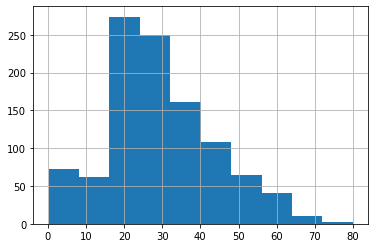

In [71]:
df8.age.hist()

<AxesSubplot:>

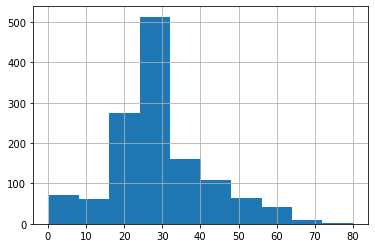

In [72]:
df8.age_mediana.hist()

<a id="section215"></a>
## <font color="#004D7F">2.1.5 Imputacion Moda</font>

#### No usar cuando hay desagregaciones(muy dispersa)

In [73]:
df9=df

In [74]:
df9.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_backward,age_media,age_mediana
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,29.0000,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,0.9167,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,2.0000,2.0000


#### ¿Cuantos valores perdidos hay?

In [75]:
df9.age.isnull().sum()

263

#### La moda es :

In [76]:
df9.age.mode()

0    24.0
dtype: float64

<a id="section2151"></a>
## <font color="#004D7F">2.1.5.1 Agregamos una columna</font>

In [77]:
df9['age_moda']=df9['age'].fillna(df9['age'].mode())

#### ¿Cuantos valores perdidos hay?

In [78]:
df9.age_moda.isnull().sum()

263

#### La moda es :

<a id="section216"></a>
## <font color="#004D7F">2.1.6 Simple Imputer- media</font>

#### SimpleImputer

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
df10=df

#### Paso 1 : imputador

In [81]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean') #median ,most_frequent

#### Paso 2 : ajustar

In [82]:
imp.fit(df10[['age']])

SimpleImputer()

#### Paso 3: transformar

In [83]:
df10['age_sim_media']=imp.transform(df10[['age']])

In [84]:
df10.age_sim_media.isnull().sum()

0

In [85]:
df.age.isnull().sum()

263

<AxesSubplot:>

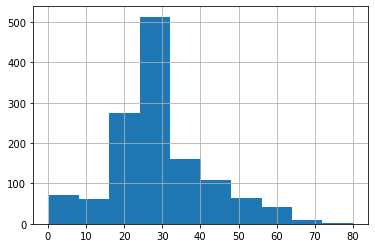

In [86]:
df10.age_sim_media.hist()

<AxesSubplot:>

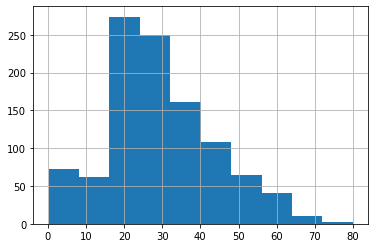

In [87]:
df.age.hist()

In [88]:
df10.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_backward,age_media,age_mediana,age_moda,age_sim_media
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,29.0000,29.0000,29.0000,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,0.9167,0.9167,0.9167,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,2.0000,2.0000,2.0000,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,30.0000,30.0000,30.0000,30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,25.0000,25.0000,25.0000,25.0000


<a id="section217"></a>
## <font color="#004D7F">2.1.7 Simple Imputer- mediana</font>

#### SimpleImputer

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
df11=df

#### Paso 1 : imputador

In [91]:
imp=SimpleImputer(missing_values=np.nan,strategy='median') #most_frequent,mean

#### Paso 2 : ajustar

In [92]:
imp.fit(df11[['age']])

SimpleImputer(strategy='median')

#### Paso 3: transformar

In [93]:
df11['age_sim_mediana']=imp.transform(df11[['age']])

In [94]:
df11.age_sim_mediana.isnull().sum()

0

In [95]:
df11.age.isnull().sum()

263

<AxesSubplot:>

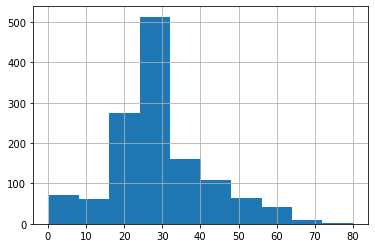

In [96]:
df11.age_sim_mediana.hist()

<AxesSubplot:>

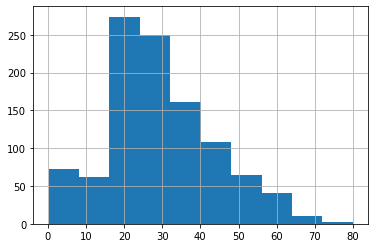

In [97]:
df.age.hist()

<a id="section218"></a>
## <font color="#004D7F">2.1.8 Simple Imputer- moda</font>

#### SimpleImputer

In [98]:
from sklearn.impute import SimpleImputer

In [99]:
df12=df

#### Paso 1 : imputador

In [100]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent') #most_frequent,mean,median

#### Paso 2 : ajustar

In [101]:
imp.fit(df12[['age']])

SimpleImputer(strategy='most_frequent')

#### Paso 3: transformar

In [102]:
df12['age_sim_moda']=imp.transform(df12[['age']])

In [103]:
df12.age_sim_moda.isnull().sum()

0

In [104]:
df.age.isnull().sum()

263

<AxesSubplot:>

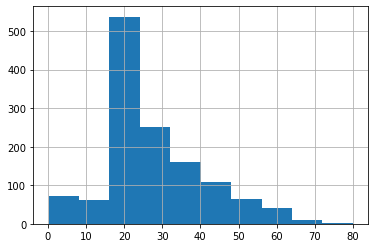

In [105]:
df12.age_sim_moda.hist()

<AxesSubplot:>

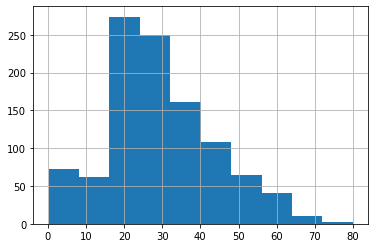

In [106]:
df.age.hist()

<a id="section3"></a>
## <font color="#004D7F">3. Outliers</font>

In [107]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'age_backward', 'age_media', 'age_mediana', 'age_moda', 'age_sim_media',
       'age_sim_mediana', 'age_sim_moda'],
      dtype='object')

<AxesSubplot:>

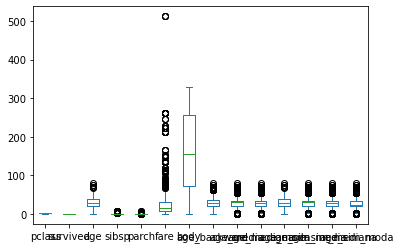

In [108]:
df.plot.box()

Text(0.5, 1.0, 'Age')

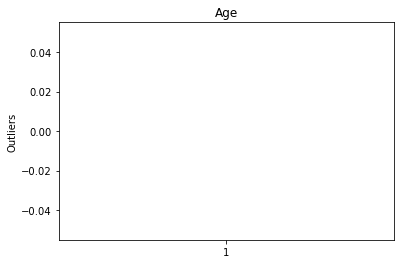

In [109]:
import matplotlib.pyplot as plt
plt.boxplot(df["age"])
plt.ylabel("Outliers")
plt.title("Age")

#### age_backward

Text(0.5, 1.0, 'age_backward')

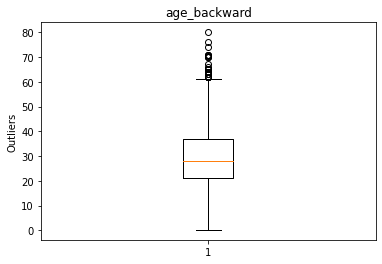

In [110]:
import matplotlib.pyplot as plt
plt.boxplot(df["age_backward"])
plt.ylabel("Outliers")
plt.title("age_backward")

#### age_media

Text(0.5, 1.0, 'age_media')

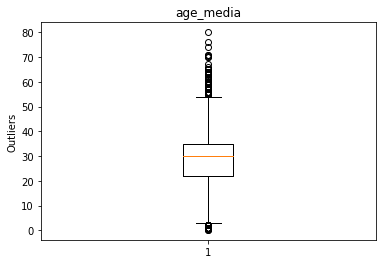

In [111]:
import matplotlib.pyplot as plt
plt.boxplot(df["age_media"])
plt.ylabel("Outliers")
plt.title("age_media")

<a id="section31"></a>
## <font color="#004D7F">3.1 Identifcando valores outliers: Univariado</font>

**1.Rango intercuartilico - RI** <br>
**2.Puntuacion Z -puntZ**

<a id="section311"></a>
## <font color="#004D7F">3.1.1 Rango Intercuartil</font>

#### Valor outliers

In [112]:
df13=df

#### Trabajamos con 'age_backward' ya que es la que mas se parece a 'age'

In [113]:
iqr=df13['age_backward'].quantile(0.75)-df13['age_backward'].quantile(0.25)

<AxesSubplot:>

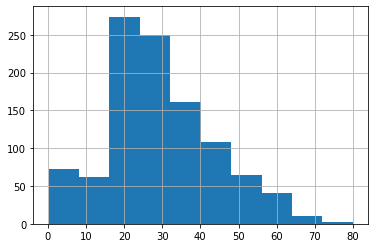

In [114]:
df.age.hist()

<AxesSubplot:>

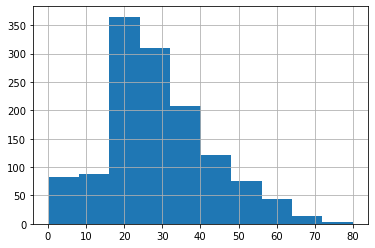

In [115]:
df13.age_backward.hist()

In [116]:
df13['age_outlier_RI']=(df13['age_backward']<np.percentile(df13['age_backward'],25)-1.5*iqr) | (df13['age_backward']>np.percentile(df13['age_backward'],75)-1.5*iqr)

In [117]:
df13[df13['age_outlier_RI']==True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,body,home.dest,age_backward,age_media,age_mediana,age_moda,age_sim_media,age_sim_mediana,age_sim_moda,age_outlier_RI
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,...,NaN,"St Louis, MO",29.0,29.000000,29.0,29.0,29.000000,29.0,29.0,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,...,135.0,"Montreal, PQ / Chesterville, ON",30.0,30.000000,30.0,30.0,30.000000,30.0,30.0,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,...,NaN,"Montreal, PQ / Chesterville, ON",25.0,25.000000,25.0,25.0,25.000000,25.0,25.0,True
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,...,NaN,"New York, NY",48.0,48.000000,48.0,48.0,48.000000,48.0,48.0,True
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,...,NaN,"Hudson, NY",63.0,63.000000,63.0,63.0,63.000000,63.0,63.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,...,328.0,NaN,14.5,14.500000,14.5,14.5,14.500000,14.5,14.5,True
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,...,NaN,NaN,26.5,29.881135,28.0,NaN,29.881135,28.0,24.0,True
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,...,304.0,NaN,26.5,26.500000,26.5,26.5,26.500000,26.5,26.5,True
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,...,NaN,NaN,27.0,27.000000,27.0,27.0,27.000000,27.0,27.0,True


In [118]:
df13.shape

(1309, 22)

In [119]:
1189/df13.shape[0]*100

90.83269671504965

### Comentario:
#### En la columna de  'age_backward'  los outliers representan el 90 % aprox

<a id="section312"></a>
## <font color="#004D7F">3.1.2 Puntuacion Z </font>

#### Recomendable tenemos mayor cobertura

In [120]:
df14=df

In [121]:
from sklearn import preprocessing

In [122]:
df14.age_backward.describe()

count    1309.000000
mean       29.385536
std        13.961495
min         0.166700
25%        21.000000
50%        28.000000
75%        37.000000
max        80.000000
Name: age_backward, dtype: float64

#### Le estoy quitando su media y le estoy dividiendo entre su desviacion estandar

In [123]:
p1=preprocessing.scale(df14['age_backward'])

In [124]:
df14['age_outlier_puntZ']=abs(p1)>2
df14

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,home.dest,age_backward,age_media,age_mediana,age_moda,age_sim_media,age_sim_mediana,age_sim_moda,age_outlier_RI,age_outlier_puntZ
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,"St Louis, MO",29.0000,29.000000,29.0000,29.0000,29.000000,29.0000,29.0000,True,False
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",0.9167,0.916700,0.9167,0.9167,0.916700,0.9167,0.9167,False,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",2.0000,2.000000,2.0000,2.0000,2.000000,2.0000,2.0000,False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",30.0000,30.000000,30.0000,30.0000,30.000000,30.0000,30.0000,True,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",25.0000,25.000000,25.0000,25.0000,25.000000,25.0000,25.0000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,...,NaN,14.5000,14.500000,14.5000,14.5000,14.500000,14.5000,14.5000,True,False
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,...,NaN,26.5000,29.881135,28.0000,NaN,29.881135,28.0000,24.0000,True,False
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,...,NaN,26.5000,26.500000,26.5000,26.5000,26.500000,26.5000,26.5000,True,False
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,...,NaN,27.0000,27.000000,27.0000,27.0000,27.000000,27.0000,27.0000,True,False


In [125]:
df14[df14["age_outlier_puntZ"]==True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,home.dest,age_backward,age_media,age_mediana,age_moda,age_sim_media,age_sim_mediana,age_sim_moda,age_outlier_RI,age_outlier_puntZ
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",0.9167,0.9167,0.9167,0.9167,0.9167,0.9167,0.9167,False,True
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,...,"Hudson, NY",63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,True,True
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,...,"Montevideo, Uruguay",71.0000,71.0000,71.0000,71.0000,71.0000,71.0000,71.0000,True,True
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,...,"Hessle, Yorks",80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,True,True
33,1,1,"Bonnell, Miss. Elizabeth",female,58.0000,0,0,113783,26.5500,C103,...,"Birkdale, England Cleveland, Ohio",58.0000,58.0000,58.0000,58.0000,58.0000,58.0000,58.0000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3,1,"Sandstrom, Miss. Beatrice Irene",female,1.0000,1,1,PP 9549,16.7000,G6,...,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,False,True
1225,3,0,"Storey, Mr. Thomas",male,60.5000,0,0,3701,NaN,NaN,...,NaN,60.5000,60.5000,60.5000,60.5000,60.5000,60.5000,60.5000,True,True
1235,3,0,"Svensson, Mr. Johan",male,74.0000,0,0,347060,7.7750,NaN,...,NaN,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000,True,True
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,...,NaN,0.4167,0.4167,0.4167,0.4167,0.4167,0.4167,0.4167,False,True


In [126]:
81/df14.shape[0]*100

6.187929717341483

### Comentario:
#### En la columna de  'age_backward'  los outliers representan el  6.18 % aprox

<a id="section32"></a>
## <font color="#004D7F">3.2 Identificacion de valores outliers :Multivariado</font>

In [127]:
df15=df14

In [128]:
df15.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,home.dest,age_backward,age_media,age_mediana,age_moda,age_sim_media,age_sim_mediana,age_sim_moda,age_outlier_RI,age_outlier_puntZ
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,"St Louis, MO",29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,True,False
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",0.9167,0.9167,0.9167,0.9167,0.9167,0.9167,0.9167,False,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,False,False


In [129]:
df15.dtypes

pclass                 int64
survived               int64
name                  object
sex                   object
age                  float64
sibsp                  int64
parch                  int64
ticket                object
fare                 float64
cabin                 object
embarked              object
boat                  object
body                 float64
home.dest             object
age_backward         float64
age_media            float64
age_mediana          float64
age_moda             float64
age_sim_media        float64
age_sim_mediana      float64
age_sim_moda         float64
age_outlier_RI          bool
age_outlier_puntZ       bool
dtype: object

In [130]:
df15.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'age_backward', 'age_media', 'age_mediana', 'age_moda', 'age_sim_media',
       'age_sim_mediana', 'age_sim_moda', 'age_outlier_RI',
       'age_outlier_puntZ'],
      dtype='object')

In [131]:
lista=['pclass','survived','fare','age_backward', 'age_media', 'age_mediana']

In [132]:
df16=df15[lista]

In [133]:
df16.head(2)

,pclass,survived,fare,age_backward,age_media,age_mediana
0,1,1,211.3375,29.0000,29.0000,29.0000
1,1,1,151.5500,0.9167,0.9167,0.9167


In [134]:
df16.isnull().sum()

pclass          0
survived        0
fare            1
age_backward    0
age_media       0
age_mediana     0
dtype: int64

In [135]:
#df8['age'].fillna(df8['age'].median())
df16['fare']=df16['fare'].fillna(df16['fare'].median())

C:\Users\Luis\AppData\Local\Temp/ipykernel_15396/1319016037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['fare']=df16['fare'].fillna(df16['fare'].median())


In [136]:
df16.isnull().sum()

pclass          0
survived        0
fare            0
age_backward    0
age_media       0
age_mediana     0
dtype: int64

In [137]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd

x = df16
#x = x.iloc[:,1:]

#matriz de covarianzas
Sx = x.cov().values
#inversa de la matriz de covarianzas
Sx = sp.linalg.inv(Sx)

mean = x.mean().values

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

In [138]:
##x:DataFrame,mean:media por columna,Sx:inversa de la matriz cov
mR = pd.DataFrame(mahalanobisR(x,mean,Sx), columns = ['mahalanobiss'])
df16['mahalanobiss']=mR

C:\Users\Luis\AppData\Local\Temp/ipykernel_15396/2502449538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['mahalanobiss']=mR


In [139]:
df16['index'] = df16.index
df16

C:\Users\Luis\AppData\Local\Temp/ipykernel_15396/3080775137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['index'] = df16.index


,pclass,survived,fare,age_backward,age_media,age_mediana,mahalanobiss,index
0,1,1,211.3375,29.0000,29.000000,29.0000,12.576953,0
1,1,1,151.5500,0.9167,0.916700,0.9167,14.186154,1
2,1,0,151.5500,2.0000,2.000000,2.0000,17.929535,2
3,1,0,151.5500,30.0000,30.000000,30.0000,8.314592,3
4,1,0,151.5500,25.0000,25.000000,25.0000,9.192503,4
...,...,...,...,...,...,...,...,...
1304,3,0,14.4542,14.5000,14.500000,14.5000,2.591991,1304
1305,3,0,14.4542,26.5000,29.881135,28.0000,4.444194,1305
1306,3,0,7.2250,26.5000,26.500000,26.5000,1.541962,1306
1307,3,0,7.2250,27.0000,27.000000,27.0000,1.544635,1307


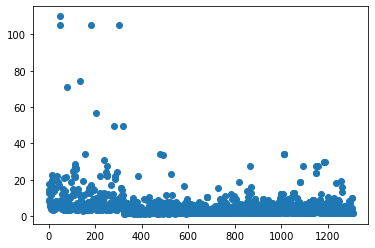

In [140]:
plt.scatter(df16["index"],df16['mahalanobiss'])

#### Todos estos valores son los outliers! 

In [141]:
df16[df16['mahalanobiss']>20]

,pclass,survived,fare,age_backward,age_media,age_mediana,mahalanobiss,index
16,1,0,247.5208,24.0,24.000000,24.0,22.499088,16
17,1,1,247.5208,50.0,50.000000,50.0,20.115523,17
35,1,1,262.3750,45.0,45.000000,45.0,21.974040,35
49,1,1,512.3292,36.0,36.000000,36.0,105.038900,49
50,1,1,512.3292,58.0,58.000000,58.0,109.923181,50
66,1,1,262.3750,36.0,36.000000,36.0,21.101409,66
74,1,0,52.0000,47.0,29.881135,28.0,21.747138,74
80,1,0,26.5500,70.0,29.881135,28.0,71.000589,80
106,1,0,221.7792,36.0,29.881135,28.0,24.645942,106
111,1,1,263.0000,24.0,24.000000,24.0,21.899932,111


<a id="section4"></a>
## <font color="#004D7F">4 cargando DataFrame </font>

Esta data trata sobre si el cliente es un buen pagador o mal pagador 
teniendo como varaibles predictoras "cuenta" , "mes" , "Ppag" ,"Uso"
,"DM","Sexo","estado"(vive solo o no vive solo). 

In [142]:
import pandas as pd
import os
data = pd.read_csv("Datos_unalm/credit2.csv",sep=';')
data.head(10)
data.dtypes
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


In [143]:
data.dtypes

Y         object
Cuenta    object
Mes        int64
Ppag      object
Uso       object
DM         int64
Sexo      object
Estc      object
dtype: object

In [144]:
data.shape

(1000, 8)

In [145]:
data.isnull().sum()

Y         0
Cuenta    0
Mes       0
Ppag      0
Uso       0
DM        0
Sexo      0
Estc      0
dtype: int64

In [146]:
data.columns

Index(['Y', 'Cuenta', 'Mes', 'Ppag', 'Uso', 'DM', 'Sexo', 'Estc'], dtype='object')

In [147]:
data.Y.unique()

array(['buen', 'mal'], dtype=object)

In [148]:
data.Y.value_counts()

buen    700
mal     300
Name: Y, dtype: int64

In [149]:
data["Y_1"]=pd.factorize(data["Y"])[0]

#### A la variable respuesta "Y" lo llevo   a "0" y "1"<br>
- buen :0 
- malo :1

In [150]:
data.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_1
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0


In [151]:
data.Y_1.value_counts()

0    700
1    300
Name: Y_1, dtype: int64

In [152]:
data['Y_1']=data.Y_1.astype("category")

In [153]:
data.Y_1.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [154]:
data.Y_1

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Y_1, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

<a id="section41"></a>
## <font color="#004D7F">4.1 Crear factores categoricos</font>

In [155]:
data["Y_2"]=pd.factorize(data["Y"])[0]
data[["Y_2","Y"]]
data["Y_2"]=data["Y_2"].astype('category')
data["Y_2"]

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Y_2, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [156]:
data.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_1,Y_2
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,0
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,0


In [157]:
data=data.drop(["Y_1"],axis=1)

In [158]:
data.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0


<a id="section42"></a>
## <font color="#004D7F">4.2 Metodos para llevar todos a un Mismo Rango</font>

#### Metodos:Se aplica a variables predictoras<br>
- 1.Normalizacion Z-score
- 2.Normalizacion Min-Max
- 3.Escalamiento Decimal
- 4.Normalizacion Softmax

#### OjO: TRANSFORMACION  "Box Cox" y "Yeo Johnsontransformer" se aplica  para las variables predictoras con el objetivo que tenga un comportamiento normal(distribucion normal)

#### Otros Apuntes:

"Normalizacion Softmax"<br>
El softmax es el m,as utlizado en **redes neuronales**
- ventaja: Se aplica cuando hay comportamiento no lineales.
- desventaja: un nuevo valor que cae fuera del rango [0,1]

"Discretizacion"<br>
- discretizacion de igual frecuencia() --> cuantiles
- discretizacion de igual amplietud() --> histograma k= 1+3.3log(observaciones)
<br>
<br>
Recomienda :Discretizacion de igual frecuencia 

"arboles"<br>
- Arboles cart ,boosting,bagging trabajan muy bien con variables categoricas, es decir le facilitamos la vida en terminos de negocio del banco podemos establecer rangos ya establecidos.

"transformacion "<br>
- Exponencial y Logaritmica reducen la heterocidasticidad(var no cte,es decir baja la demasiada dispersion)

<a id="section421"></a>
## <font color="#004D7F">4.2.1 Normalizacion Z-Score</font>

In [159]:
data.columns

Index(['Y', 'Cuenta', 'Mes', 'Ppag', 'Uso', 'DM', 'Sexo', 'Estc', 'Y_2'], dtype='object')

In [160]:
from sklearn import preprocessing
data["DM_z"]=preprocessing.scale(data["DM"])

In [161]:
data.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_z
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384


<a id="section422"></a>
## <font color="#004D7F">4.2.2 Normalizacion Min-Max</font>

In [162]:
data.columns

Index(['Y', 'Cuenta', 'Mes', 'Ppag', 'Uso', 'DM', 'Sexo', 'Estc', 'Y_2',
       'DM_z'],
      dtype='object')

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

a=scaler.fit_transform(data[["DM"]])
data["DM_MinMax"]=pd.DataFrame(data=a)
data["DM_MinMax"].max()

1.0

In [164]:
data["DM_MinMax"].min()

0.0

In [165]:
data.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_z,DM_MinMax
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255


<a id="section423"></a>
## <font color="#004D7F">4.2.3 Escalamiento Decimal</font>

In [166]:
maxvect=max(abs(data["DM"]))
maxvect

18424

In [167]:
import math
kvector=math.floor(math.log10(maxvect))
kvector=kvector+1

In [168]:
scalefactor = 10**kvector
scalefactor

100000

In [169]:
data["DM_EscDecimal"]=data["DM"]/scalefactor

In [170]:
data.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_z,DM_MinMax,DM_EscDecimal
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964,0.01049
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255,0.02799


<a id="section424"></a>
## <font color="#004D7F">4.2.4 Normalizacion softmax</font>

In [171]:
A = preprocessing.scale(data["DM"])
M=pd.DataFrame(data=A,columns=["A"])
M
M["A"]=M["A"]*-1
M
N=1/(1+np.exp(M["A"]))
data["DM_Softmax"]=N
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_z,DM_MinMax,DM_EscDecimal,DM_Softmax
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964,0.01049,0.312672
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255,0.02799,0.458251
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381,0.032519,0.00841,0.297051
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341,0.103004,0.02122,0.399550
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974,0.105700,0.02171,0.403724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191,0.095576,0.01987,0.388127
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187,0.112964,0.02303,0.415035
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852,0.683944,0.12680,0.965605
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062,0.342137,0.06468,0.756403


<a id="section425"></a>
## <font color="#004D7F">4.2.5 Visualizacion</font>

In [172]:
data.columns

Index(['Y', 'Cuenta', 'Mes', 'Ppag', 'Uso', 'DM', 'Sexo', 'Estc', 'Y_2',
       'DM_z', 'DM_MinMax', 'DM_EscDecimal', 'DM_Softmax'],
      dtype='object')

In [173]:
lista1=['DM_z', 'DM_MinMax', 'DM_EscDecimal', 'DM_Softmax']

<AxesSubplot:>

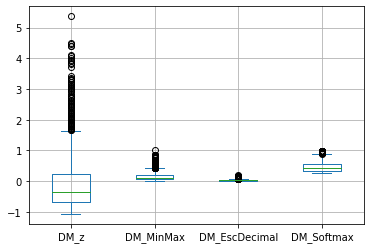

In [174]:
data[lista1].plot.box(grid='True') #grid='True'


#### Comentario _:

- 1.Normalizacion Z-score : esta en un rango de  [-1,5]

- 2.Normalizacion Min-Max : esta en un rango de  [0,1]

- 3.Escalamiento Decimal : esta en un rango de  [0,1]

- 4.Normalizacion Softmax : esta en un rango de  [0,1]

<AxesSubplot:>

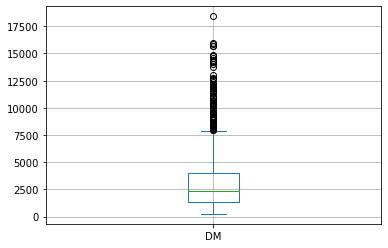

In [175]:
data[["DM"]].plot.box(grid='True') #grid='True'

- En este caso se escalo la variable predictora "DM" 

### Recapitulando :
#### PASO 1 :Identificar los Outliers :<br>

##### univariado  

- 1.rango intercuartil 
- 2. puntuacion Z (Resta media y divide desviacion estandar)

##### multivariado

- 1.Mahalanobis

#### PASO 2: Normalizacion o escalamiento a las variables predictoras
- 1.Normalizacion Z-score
- 2.Normalizacion Min-Max
- 3.Escalamiento Decimal
- 4.Normalizacion Softmax

#### PASO 3: Si se desea llevar las variables predictoras a un comportamiento normal(distiribucion normal) a las variables predictoras.

- Box Cox 
- Yeo Johnsontransformer


<a id="section5"></a>
## <font color="#004D7F">5 Variables Categoricas y Transfomaciones</font>

In [176]:
!pip install feature_engine

In [177]:
import pandas as pd
import os 
dat=pd.read_csv("Datos_unalm/credit2.csv",sep=";")

In [178]:
dat.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo


In [179]:
dat.describe()

,Mes,DM
count,1000.000000,1000.00000
mean,20.903000,3271.24800
std,12.058814,2822.75176
min,4.000000,250.00000
25%,12.000000,1365.50000
50%,18.000000,2319.50000
75%,24.000000,3972.25000
max,72.000000,18424.00000


### Grafica de desviacion - Un mejor panorama lo multiplicamos por 'logaritmo'

C:\Users\Luis\AppData\Local\Temp/ipykernel_15396/232771078.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dat.std().plot(kind='bar',figsize=(8,6),logy=True,title='variables con sd')


<AxesSubplot:title={'center':'variables con sd'}>

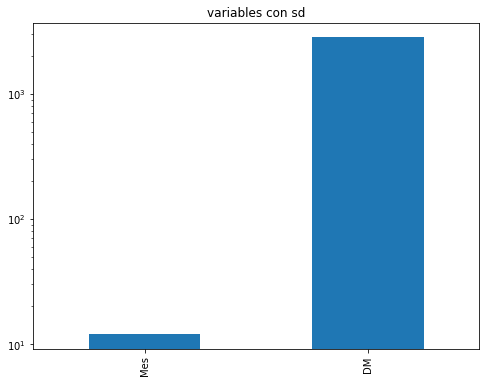

In [180]:
dat.std().plot(kind='bar',figsize=(8,6),logy=True,title='variables con sd')

#### Comentario _:

- cuantitativas:
    Las variables "Mes","DM"  tienen una variabilidad regular 
- cualitativas:
    Por defecto no se visualiza

<a id="section51"></a>
## <font color="#004D7F">5.1 Factores de igual frecuencias</font>

In [181]:
from feature_engine import discretisation as dsc

<a id="section511"></a>
## <font color="#004D7F">5.1.1 Variable predictora "DM"  lo rankeamos en 10 partes</font>


In [182]:
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['DM']) # hay 10 categorias q=10

#### paso 1 : ajustamos

In [183]:
disc.fit(dat)

EqualFrequencyDiscretiser(variables=['DM'])

#### paso 2 : transformamos

In [184]:
data_transformada= disc.transform(dat)

In [185]:
data_transformada["N"]=1
data_transformada.tail(6)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,N
994,mal,no,12,pre mal pagador,privado,8,hombre,no vive solo,1
995,mal,no,24,pre buen pagador,privado,4,hombre,no vive solo,1
996,mal,no,24,pre buen pagador,profesional,4,hombre,no vive solo,1
997,mal,good running,21,pre buen pagador,profesional,9,hombre,no vive solo,1
998,mal,bad running,12,pre buen pagador,privado,8,hombre,no vive solo,1
999,mal,no,30,pre buen pagador,privado,8,hombre,no vive solo,1


<a id="section512"></a>
## <font color="#004D7F">5.1.2 Se puede observar que  la varaible predictora "DM" toma los valores de [0,9]</font>

In [186]:
data_transformada.DM.unique()

array([1, 5, 0, 4, 6, 2, 7, 8, 9, 3], dtype=int64)

<a id="section513"></a>
## <font color="#004D7F">5.1.3 Agrupamos la variable predictora "DM"</font>

In [187]:
DM_conteo_agrupar=data_transformada.groupby(['DM'])

In [188]:
DM_conteo_agrupar

<a id="section5131"></a>
## <font color="#004D7F">5.1.3.1 Conteo de la variable predictora "DM"</font>

In [189]:
DM_conteo_agrupar.sum()[["N"]]

,N
DM,
0,100
1,101
2,99
3,100
4,100
5,100
6,101
7,99
8,100


<a id="section52"></a>
## <font color="#004D7F">5.2 Factores de igual amplietud de intervalos</font>

In [190]:
dat["DM_igual_amplietud"]=dat["DM"]
disc = dsc.EqualWidthDiscretiser(bins=10, variables=['DM'])  # hay 10 categorias

#### paso 1 : ajustar

In [191]:
disc.fit(dat)

EqualWidthDiscretiser(variables=['DM'])

#### paso 2:transformar

In [192]:
DM_conteo_agrupar_1= disc.transform(dat)
DM_conteo_agrupar_1["N"]=1
DM_conteo_agrupar_1

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_igual_amplietud,N
0,buen,no,18,pre buen pagador,privado,0,mujer,vive solo,1049,1
1,buen,no,9,pre buen pagador,profesional,1,hombre,no vive solo,2799,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,841,1
3,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,2122,1
4,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,2171,1
...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,0,hombre,no vive solo,1987,1
996,mal,no,24,pre buen pagador,profesional,1,hombre,no vive solo,2303,1
997,mal,good running,21,pre buen pagador,profesional,6,hombre,no vive solo,12680,1
998,mal,bad running,12,pre buen pagador,privado,3,hombre,no vive solo,6468,1


<a id="section521"></a>
## <font color="#004D7F">5.2.1 Agrupamos la variable predictora "DM"</font>

In [193]:
DM_conteo_agrupar_1.DM.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

<a id="section522"></a>
## <font color="#004D7F">5.2.2 Conteo de la variable predictora "DM"</font>

In [194]:
DM_conteo_agrupar=DM_conteo_agrupar_1.groupby(['DM'])
DM_conteo_agrupar

<a id="section5221"></a>
## <font color="#004D7F">5.2.2.1 Conteo de la variable predictora "DM"</font>

In [195]:
DM_conteo_agrupar.sum()[["N"]]

,N
DM,
0,445
1,293
2,97
3,80
4,38
5,19
6,14
7,8
8,5


<a id="section6"></a>
## <font color="#004D7F">6 Transformacion de Variables</font>

- transformacion "box cox"   
- transformacion "Yeo-Johnson"
- transformacion "exponencial"
- transformacion "logaritmica"

#### Objetivo: Mis variables predictoras se distribuyan normalmente (campana)

<a id="section61"></a>
## <font color="#004D7F">6.1 transformacion "logaritmica"</font>

In [196]:
from feature_engine import transformation as vt

# set up the variable transformer
tf = vt.LogTransformer(variables = ['DM'])

#### paso 1 : ajustar

In [197]:
# fit the transformer
tf.fit(dat)

LogTransformer(variables=['DM'])

#### paso 2: transformar

In [198]:

# transform the data
data_log= tf.transform(dat)
data_log

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_igual_amplietud
0,buen,no,18,pre buen pagador,privado,6.955593,mujer,vive solo,1049
1,buen,no,9,pre buen pagador,profesional,7.937017,hombre,no vive solo,2799
2,buen,bad running,12,pre buen pagador,profesional,6.734592,mujer,vive solo,841
3,buen,no,12,pre buen pagador,profesional,7.660114,hombre,no vive solo,2122
4,buen,no,12,pre buen pagador,profesional,7.682943,hombre,no vive solo,2171
...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,7.594381,hombre,no vive solo,1987
996,mal,no,24,pre buen pagador,profesional,7.741968,hombre,no vive solo,2303
997,mal,good running,21,pre buen pagador,profesional,9.447781,hombre,no vive solo,12680
998,mal,bad running,12,pre buen pagador,privado,8.774622,hombre,no vive solo,6468


#### Data sin transformar la variable "DM" (PREDICTORA)  : dat

<AxesSubplot:>

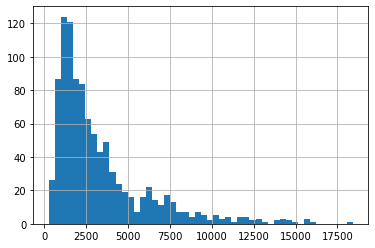

In [199]:
# un-transformed variable
dat['DM'].hist(bins=50)

#### Data  transformar la variable "DM" (PREDICTORA)   :data_log 

<AxesSubplot:>

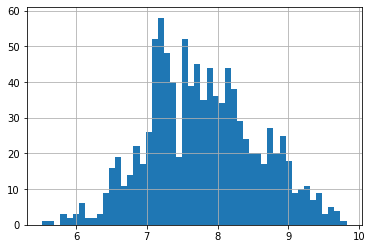

In [200]:
data_log["DM"].hist(bins=50)

In [201]:
data_log.head(2)

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_igual_amplietud
0,buen,no,18,pre buen pagador,privado,6.955593,mujer,vive solo,1049
1,buen,no,9,pre buen pagador,profesional,7.937017,hombre,no vive solo,2799


#### Comentario :

- Se puede observar que la varaible predictora "DM"  se distribuye normal ,gracias a la tranformacion logaritmica
  el beneficio es que la variancia ahora es cte.

<a id="section62"></a>
## <font color="#004D7F">6.2 transformacion "exponencial"</font>

In [202]:
from feature_engine import transformation as vt

# set up the variable transformer
tf = vt.PowerTransformer(variables = ['DM'], exp=0.5)

#### paso 1 : ajustar

In [203]:
# fit the transformer
tf.fit(dat)

PowerTransformer(variables=['DM'])

#### paso 2: transformar

In [204]:
# transform the data
data_exp= tf.transform(dat)
data_exp

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_igual_amplietud
0,buen,no,18,pre buen pagador,privado,32.388269,mujer,vive solo,1049
1,buen,no,9,pre buen pagador,profesional,52.905576,hombre,no vive solo,2799
2,buen,bad running,12,pre buen pagador,profesional,29.000000,mujer,vive solo,841
3,buen,no,12,pre buen pagador,profesional,46.065171,hombre,no vive solo,2122
4,buen,no,12,pre buen pagador,profesional,46.593991,hombre,no vive solo,2171
...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,44.575778,hombre,no vive solo,1987
996,mal,no,24,pre buen pagador,profesional,47.989582,hombre,no vive solo,2303
997,mal,good running,21,pre buen pagador,profesional,112.605506,hombre,no vive solo,12680
998,mal,bad running,12,pre buen pagador,privado,80.423877,hombre,no vive solo,6468


<AxesSubplot:>

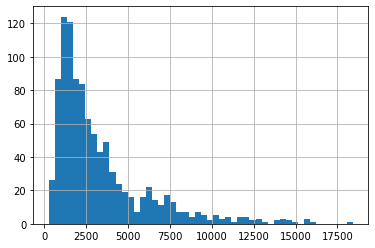

In [205]:
# un-transformed variable
dat['DM'].hist(bins=50)

<AxesSubplot:>

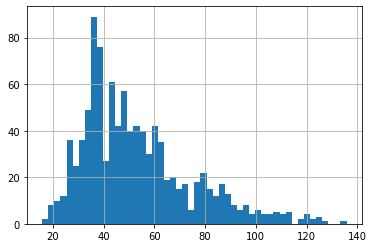

In [206]:
data_exp["DM"].hist(bins=50)

<a id="section63"></a>
## <font color="#004D7F">6.3 transformacion "box cox"</font>

Una transformación de Box-Cox de los datos de su proceso puede ayudar a corregir las siguientes condiciones: Los datos del proceso no están distribuidos normalmente y problemas de heterocedasticidad (la varianza de los errores no es constante).

In [207]:
tf = vt.BoxCoxTransformer(variables = ['DM'])

#### paso 1 :ajustar

In [208]:
tf.fit(dat)

BoxCoxTransformer(variables=['DM'])

#### paso 2 :transformar

In [209]:
data_boxcox= tf.transform(dat)

<AxesSubplot:>

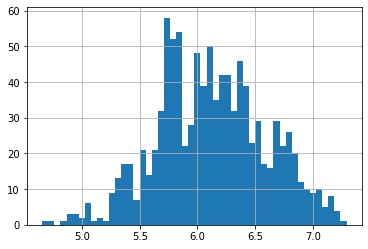

In [210]:
#box cox variable
data_boxcox['DM'].hist(bins=50)

<AxesSubplot:>

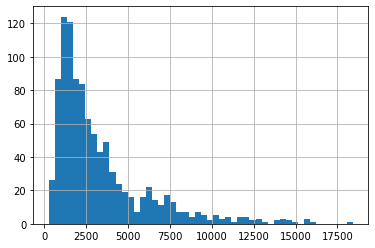

In [211]:
dat['DM'].hist(bins=50)

<a id="section64"></a>
## <font color="#004D7F">6.4 transformacion "Yeo-Johnson"</font>

In [212]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['DM'])

#### paso 1 : ajustar 

In [213]:
# fit the transformer
tf.fit(dat)
#Learns the optimal lambda for the Yeo-Johnson transformation.

YeoJohnsonTransformer(variables=['DM'])

#### paso 2 : transformar 

In [214]:
# transform the data
data_Yeo_Johnson= tf.transform(dat)

<AxesSubplot:>

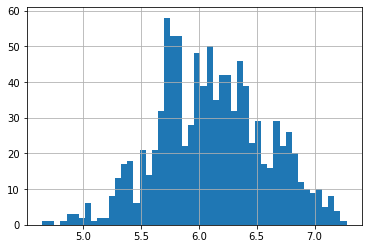

In [215]:
# un-transformed variable
data_Yeo_Johnson['DM'].hist(bins=50)

<AxesSubplot:>

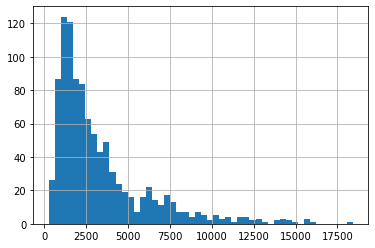

In [216]:
dat['DM'].hist(bins=50)

<a id="section7"></a>
## <font color="#004D7F">7 Variables dummy</font>

In [217]:
dat.Sexo.value_counts()

hombre    598
mujer     402
Name: Sexo, dtype: int64

In [218]:
dummy_sexo = pd.get_dummies(dat["Sexo"], prefix="genero") ### prefijo --> prefix="sex"

In [219]:
dummy_sexo

,genero_hombre,genero_mujer
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
995,1,0
996,1,0
997,1,0
998,1,0
